# EICU TBI data extraction & exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style="darkgrid")

## TBI patients (>= 18 yrs) 

#### ICDs:
ICD10CM: S02*, S04*, S06*, S07*, S09*, T02, T04, T06

ICD9CM: 800*, 801*, 803*, 804*, 850.1 – 850.5, 850.9, 851*, 852*, 853*, 854*, 959.01

translates to regex: r"^(S0[24679]|T0[246]|80[0-4]|850[1-59]|85[1-4]|95901$)"

In [3]:
diag = pd.read_csv("./eicu-collaborative-research-database-2.0/diagnosis.csv.gz", compression="gzip")
drugs = pd.read_csv("./eicu-collaborative-research-database-2.0/infusionDrug.csv.gz", compression="gzip")
icd_codes = r"^(S0[24679]|T0[246]|80[0-4]|850[1-59]|85[1-4]|95901$)"

In [4]:
diag.head()

,diagnosisid,patientunitstayid,activeupondischarge,diagnosisoffset,diagnosisstring,icd9code,diagnosispriority
0,4222318,141168,False,72,cardiovascular|chest pain / ASHD|coronary arte...,"414.00, I25.10",Other
1,3370568,141168,True,118,cardiovascular|ventricular disorders|cardiomyo...,NaN,Other
2,4160941,141168,False,72,pulmonary|disorders of the airways|COPD,"491.20, J44.9",Other
3,4103261,141168,True,118,pulmonary|disorders of the airways|COPD,"491.20, J44.9",Other
4,3545241,141168,True,118,cardiovascular|ventricular disorders|congestiv...,"428.0, I50.9",Other


In [5]:
diag = diag.loc[diag['icd9code'].str.match(r"^(S0[24679]|T0[246]|80[0-4]|850[1-59]|85[1-4]|95901$)") == True]
diagnoses_counts = diag.value_counts(["icd9code"]).to_frame().reset_index()

In [6]:
print("Among TBI diagnoses:")
print("--------------------")
print(f"Number of diagnoses: {len(diag)}")
print(f"Unique Patient stays: {diag['patientunitstayid'].nunique()}")
print("Top 10 diagnoses:")
pd.set_option('display.max_colwidth', 100)
diagnoses_counts.head(10)

Among TBI diagnoses:
--------------------
Number of diagnoses: 32077
Unique Patient stays: 5005
Top 10 diagnoses:


,icd9code,0
0,"852.20, S06.5",7781
1,"852.00, S06.6",6427
2,"851.80, S06.9",2991
3,"854.00, S06.9",2297
4,"854.06, S06.9",1353
5,"851.00, S06.9",1339
6,"853.00, S06.9",1015
7,802.8,925
8,"854.02, S06.9",863
9,802.4,820


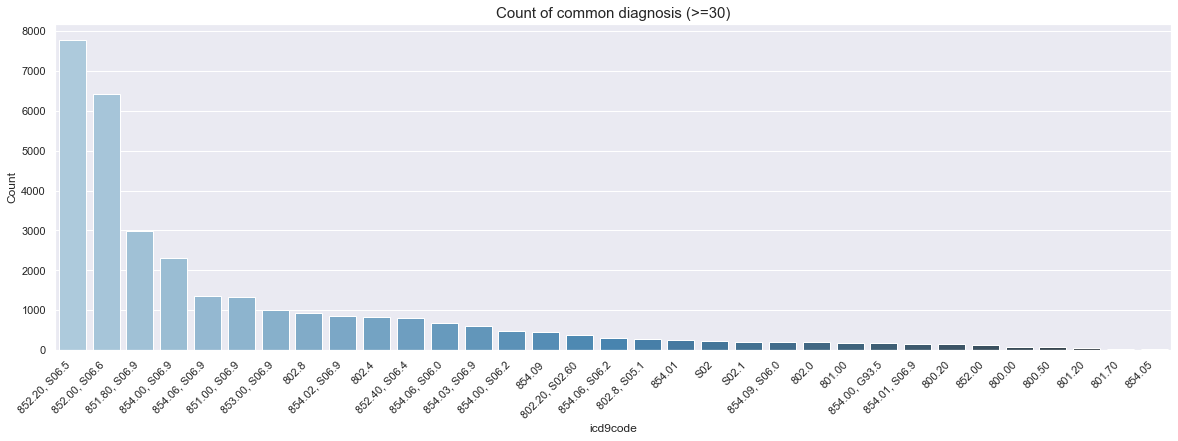

In [6]:
plt.figure(figsize=(20,6))
plt.title("Count of common diagnosis (>=30)", fontsize=15)
ax = sns.barplot(x="icd9code", y=0, data=diagnoses_counts[diagnoses_counts[0]>30], palette="Blues_d")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

In [7]:
# def find_ids(row):
#     kws = ["mannitol", "saline", "nacl"]
#     name = str(row["drugname"]).lower()
#     for kw in kws:
#         if kw in name:
#             ms.add(row["drugname"])
# ms = {}
# drugs.apply(find_ids, axis=1)

In [6]:
diag_drugs = pd.merge(diag, drugs, on="patientunitstayid")

In [7]:
# diag_drugs.loc[diag_drugs["drugname"]]

In [8]:
sal = [
    ' 3% NACL (ml/hr)',
 '3 % NaCl (ml/hr)',
 '3 % SALINE (ml/hr)',
 '3 % saline (ml/hr)',
 '3 %NaCl (ml/hr)',
 '3 NACL (ml/hr)',
 '3 nacl (ml/hr)',
 '3%  SALINE (ml/hr)',
 '3% HYPERTONIC SALINE (ml/hr)',
 '3% Hypertonic NaCl (ml/hr)',
 '3% Hypertonic Saline',
 '3% Hypertonic Saline (ml/hr)',
 '3% NACL (ml/hr)',
 '3% NORMAL SALINE (ml/hr)',
 '3% NaCL  (ml/hr)',
 '3% NaCL (ml/hr)',
 '3% NaCl (ml/hr)',
 '3% Nacl (ml/hr)',
 '3% Normal Saline (ml/hr)',
 '3% SALINE (ml/hr)',
 '3% Saline (ml/hr)',
 '3% hypertonic saline  (ml/hr)',
 '3% hypertonic saline (ml/hr)',
 '3% nacl (ml/hr)',
 '3% normal saline (ml/hr)',
 '3% saline',
 '3% saline (ml/hr)',
 '3%NACL (ml/hr)',
 '3%NaCL (ml/hr)',
 '3%NaCl (ml/hr)',
 '3%Nacl (ml/hr)',
 '3%hypertonic saline (ml/hr)',
'Hypertonic 3% Saline (ml/hr)',
 'Hypertonic 3% saline (ml/hr)',
 'Hypertonic Saline (ml/hr)',
 'Hypertonic Saline 3% (ml/hr)',
 'Hypertonic saline (ml/hr)',
'NaCl 3% (ml/hr)',
 'NaCl 3% Hypertonic (ml/hr)',
'hypertonic saline (ml/hr)',
]

sal_d = [ '23.4% NaCl (ml/hr)',
 '23.4% nacl (ml/hr)',]

man = [
    'Mannitol (ml/hr)',
 'Mannitol 20%',
 'Mannitol 20% (ml/hr)',
 'Mannitol IVF Infused (ml/hr)',
 'mannitol (ml/hr)',
]

man_d = [
     'Mannitol gtt(100gm/500mL) 100 g Dextrose 5% 500 ml (Unknown)',
 'Mannitol gtt(100gm/500mL) 50 g Dextrose 5% 250 ml (Unknown)',
 'Mannitol gtt(100gm/500mL) 50 g Dextrose 5% 500 ml (Unknown)',
 'Mannitol gtt(25gms/500mL) 25 g Dextrose 5% 500 ml (Unknown)',
]

In [9]:
def label_drug(row):
    if str(row["drugname"]) in man:
        return "mannitol"
    elif str(row["drugname"]) in man_d:
        return "mannitol + dextrose"
    elif str(row["drugname"]) in sal:
        return "hypertonic saline"
    elif str(row["drugname"]) in sal_d:
        return "23.4p hypertonic saline"
    else:
        return "others"

diag_drugs["ms"] = diag_drugs.apply(label_drug, axis=1)

In [10]:
diag_drugs1 = diag_drugs[diag_drugs["ms"]!="others"]

In [11]:
diag_drugs['patientunitstayid'].nunique()

1733

In [14]:
diag_drugs1.head()

,diagnosisid,patientunitstayid,activeupondischarge,diagnosisoffset,diagnosisstring,icd9code,diagnosispriority,infusiondrugid,infusionoffset,drugname,drugrate,infusionrate,drugamount,volumeoffluid,patientweight,ms
14411,4875592,306989,False,432,burns/trauma|trauma - CNS|intracranial injury|with loss of consciousness of unknown duration,"854.06, S06.2",Major,1990086,2405,NaCl 3% (ml/hr),0,0.0,NaN,NaN,NaN,3p hypertonic saline
14414,4875592,306989,False,432,burns/trauma|trauma - CNS|intracranial injury|with loss of consciousness of unknown duration,"854.06, S06.2",Major,1965137,1625,NaCl 3% (ml/hr),30,30.0,NaN,NaN,NaN,3p hypertonic saline
14415,4875592,306989,False,432,burns/trauma|trauma - CNS|intracranial injury|with loss of consciousness of unknown duration,"854.06, S06.2",Major,1953244,1865,NaCl 3% (ml/hr),30,30.0,NaN,NaN,NaN,3p hypertonic saline
14416,4875592,306989,False,432,burns/trauma|trauma - CNS|intracranial injury|with loss of consciousness of unknown duration,"854.06, S06.2",Major,1950727,2165,NaCl 3% (ml/hr),30,30.0,NaN,NaN,NaN,3p hypertonic saline
14417,4875592,306989,False,432,burns/trauma|trauma - CNS|intracranial injury|with loss of consciousness of unknown duration,"854.06, S06.2",Major,1958210,425,NaCl 3% (ml/hr),30,30.0,NaN,NaN,NaN,3p hypertonic saline


In [15]:
diag_drugs1[(diag_drugs1["patientunitstayid"]==306989) & (diag_drugs1["drugrate"]!="0") & (diag_drugs1["diagnosispriority"]=="Primary")].drop_duplicates("infusiondrugid")

,diagnosisid,patientunitstayid,activeupondischarge,diagnosisoffset,diagnosisstring,icd9code,diagnosispriority,infusiondrugid,infusionoffset,drugname,drugrate,infusionrate,drugamount,volumeoffluid,patientweight,ms
14440,4814952,306989,False,748,burns/trauma|trauma - CNS|intracranial injury|with subdural hematoma,"852.20, S06.5",Primary,1965137,1625,NaCl 3% (ml/hr),30,30.0,NaN,NaN,NaN,3p hypertonic saline
14441,4814952,306989,False,748,burns/trauma|trauma - CNS|intracranial injury|with subdural hematoma,"852.20, S06.5",Primary,1953244,1865,NaCl 3% (ml/hr),30,30.0,NaN,NaN,NaN,3p hypertonic saline
14442,4814952,306989,False,748,burns/trauma|trauma - CNS|intracranial injury|with subdural hematoma,"852.20, S06.5",Primary,1950727,2165,NaCl 3% (ml/hr),30,30.0,NaN,NaN,NaN,3p hypertonic saline
14443,4814952,306989,False,748,burns/trauma|trauma - CNS|intracranial injury|with subdural hematoma,"852.20, S06.5",Primary,1958210,425,NaCl 3% (ml/hr),30,30.0,NaN,NaN,NaN,3p hypertonic saline


In [12]:
diag_drugs2 = diag_drugs1[(diag_drugs1["infusionrate"]!="0")].drop_duplicates("infusiondrugid")

In [37]:
print("Total number of Hypertonic Saline / Mannitol uses:")
print("----------------------------------")
print(diag_drugs2.value_counts([ "ms"]))
print("\nAmong Hypertonic Saline / Mannitol uses:")
print("----------------------------------")
print(f"Unique Patient stays: {diag_drugs2['patientunitstayid'].nunique()}")

Total number of Hypertonic Saline / Mannitol uses:
----------------------------------
ms                 
hypertonic saline      545
mannitol               209
mannitol + dextrose      5
dtype: int64

Among Hypertonic Saline / Mannitol uses:
----------------------------------
Unique Patient stays: 60


In [7]:
patients = diag["patientunitstayid"].unique()

In [3]:
from tqdm import tqdm

In [4]:
vitals = pd.read_csv("./eicu-collaborative-research-database-2.0/vitalPeriodic.csv.gz", compression="gzip", chunksize=50000)
vts = {}
for v in tqdm(vitals):
    patients = list(v[~(v["icp"].isnull())]['patientunitstayid'])
    for patient in patients:
        if patient not in vts:
            vts[patient] = 0
        vts[patient] += 1
#     vts = vts.append(v)#v.loc[(v['patientunitstayid'].isin(patients))])

2934it [03:35, 13.65it/s]


In [5]:
a = list(vts.values())

In [7]:
len(a)

1634

In [16]:
a = list((vts[~(vts["icp"].isnull())].value_counts(['patientunitstayid'])))#.to_csv("eicu_tbi_patient_icp_records.csv", index=False)

In [6]:
i = 0
ii=0
for j in a:
    if j > 10:
        i+=1
    if j>100:
        ii+=1
print(i, ii)

1405 1353


In [31]:
vts.to_csv("eicu_all_tbi_patient_vitals.csv", index=False)

In [30]:
vts.value_counts(['patientunitstayid']) - vts[vts['icp'].isnull()].value_counts(['patientunitstayid'])

patientunitstayid
306989                 524
443155                   0
566740                   0
568858                1204
572424                   0
573005                   0
578353                   0
588720                3353
594168                6409
596967                   0
607106                 911
621883                1452
622635                   0
625891                   0
627661                   0
649154                8861
661672                   0
669189                   0
678301                1957
705339                   0
708209                   0
711642                   0
730847                   0
737676                   0
740972                   0
759141                   0
763960                   0
789888                   0
803290                3409
842038                   0
849073                   0
865863                4171
867462                   0
883872                 511
884696                   0
887608                   0
889314    

In [ ]:
patient_end = pd.read_csv("./eicu-collaborative-research-database-2.0/apachePatientResult.csv.gz", compression="gzip")
patient_end = patient_end.loc[(patient_end['patientunitstayid'].isin(patients))]

In [36]:
def label_drug(row):
    if str(row["drugname"]) in man:
        return "mannitol"
    elif str(row["drugname"]) in man_d:
        return "mannitol + dextrose"
    elif str(row["drugname"]) in sal:
        return "hypertonic saline"
    elif str(row["drugname"]) in sal_d:
        return "23.4p hypertonic saline"
    else:
        return "others"

diag_drugs2["ms"] = diag_drugs2.apply(label_drug, axis=1)

In [ ]:
patient_states = []

In [60]:
treatment = diag_drugs2[["patientunitstayid", "infusionoffset", "ms","infusionrate"]].copy()
treatment["type"] = "ACTION"

In [67]:
treatment = treatment.rename(columns={"infusionoffset": "offset"})

In [69]:
import numpy as np
treatment["icp"]=np.nan

In [23]:
diag_drugs[(diag_drugs["drugrate"]!="0")].drop_duplicates("infusiondrugid")['patientunitstayid'].nunique()

1731

In [54]:
vts1 = vts.sort_values(["patientunitstayid", "observationoffset"])[["patientunitstayid","observationoffset","icp"]]

In [58]:
vts1["type"] = "STATE"

In [66]:
vts1.dropna(subset=["icp"]).rename(columns={"observationoffset": "offset"})

,patientunitstayid,offset,icp,type
11131154,306989,9,14.0,STATE
11131145,306989,14,16.0,STATE
11131136,306989,19,13.0,STATE
11131121,306989,24,14.0,STATE
11131106,306989,29,14.0,STATE
...,...,...,...,...
145789246,3347750,5393,8.0,STATE
145789238,3347750,5398,8.0,STATE
145790392,3347750,5403,8.0,STATE
145790684,3347750,5408,7.0,STATE


In [71]:
vta1 = vts1.dropna(subset=["icp"]).rename(columns={"observationoffset": "offset"})

In [72]:
vta1["ms"] = "-"
vta1["infusionrate"] = np.nan

In [70]:
treatment

,patientunitstayid,offset,ms,infusionrate,type,icp
14414,306989,1625,hypertonic saline,30.0,ACTION,NaN
14415,306989,1865,hypertonic saline,30.0,ACTION,NaN
14416,306989,2165,hypertonic saline,30.0,ACTION,NaN
14417,306989,425,hypertonic saline,30.0,ACTION,NaN
17535,443155,2120,hypertonic saline,30.0,ACTION,NaN
...,...,...,...,...,...,...
8013825,3337641,378,mannitol + dextrose,NaN,ACTION,NaN
8013827,3337641,1039,mannitol + dextrose,NaN,ACTION,NaN
8013829,3337641,711,mannitol + dextrose,NaN,ACTION,NaN
8018755,3345436,1922,mannitol + dextrose,NaN,ACTION,NaN


In [51]:
patient_end.drop_duplicates(["patientunitstayid", "actualicumortality"])[["patientunitstayid", "actualicumortality"]].to_csv("eicu_patient_ends.csv", index=False)

In [50]:
patient_end[["patientunitstayid"]].nunique()

patientunitstayid    53
dtype: int64

In [75]:
out = treatment.append(vta1).sort_values(["patientunitstayid", "offset"])

In [77]:
out[out["patientunitstayid"] == patients[0]]

,patientunitstayid,offset,ms,infusionrate,type,icp
11131154,306989,9,-,NaN,STATE,14.0
11131145,306989,14,-,NaN,STATE,16.0
11131136,306989,19,-,NaN,STATE,13.0
11131121,306989,24,-,NaN,STATE,14.0
11131106,306989,29,-,NaN,STATE,14.0
...,...,...,...,...,...,...
11131059,306989,2644,-,NaN,STATE,4.0
11131104,306989,2649,-,NaN,STATE,4.0
11130987,306989,2654,-,NaN,STATE,4.0
11131086,306989,2659,-,NaN,STATE,4.0


In [79]:
out.to_csv("eicu_patient_state_actions.csv", index=False)

In [16]:
nurseCharting = pd.read_csv("./eicu-collaborative-research-database-2.0/nurseCharting.csv.gz", compression="gzip", chunksize=10000)
nurse = pd.DataFrame()
for n in nurseCharting:
    nurse = nurse.append(n.loc[(n['patientunitstayid'].isin(patients))])

In [20]:
nurse[nurse["nursingchartcelltypevallabel"]=="ICP"]['patientunitstayid'].unique()

array([ 306989, 1031201, 1811762, 1821244, 3201188, 3205716, 3205717,
       3210646, 3212405, 3217980, 3227651, 3229717, 3229718, 3345436,
       3347750], dtype=int64)

In [27]:
nurse[nurse["nursingchartcelltypevallabel"]=="Glasgow coma score"]['patientunitstayid'].value_counts()

3227651    3654
3212405    2864
1031201    1756
1052053    1517
594168     1358
3201188    1324
588720     1280
921542     1148
865863     1140
3205717    1140
649154     1134
803290     1100
3217980    1002
3210646     966
607106      646
849073      546
621883      516
3205716     492
678301      480
3244804     448
883872      440
3159353     404
789888      392
3229717     376
669189      364
3211492     360
573005      324
711642      320
737676      240
950067      232
661672      224
566740      220
1852552     188
578353      164
1811762     164
627661      164
3347750     148
887608      146
889314      144
443155      136
705339      128
3229718     120
1821244     120
708209      116
867462      112
568858      103
572424       88
842038       84
596967       82
622635       80
763960       80
884696       64
625891       60
892782       60
3345436      32
759141       24
306989       20
730847       13
740972        4
Name: patientunitstayid, dtype: int64

In [24]:
nurse["nursingchartcelltypevallabel"].unique()

array(['Invasive BP', 'Heart Rate', 'Non-Invasive BP', 'O2 Saturation',
       'O2 Admin Device', 'Respiratory Rate', 'CPP', 'ICP', 'Temperature',
       'O2 L/%', 'Glasgow coma score', 'Pain Score/Goal',
       'Sedation Scale/Score/Goal', 'Bedside Glucose', 'Fall Risk',
       'SpO2', 'CVP', 'Electrolyte Replacement', 'Delirium Scale/Score',
       'End Tidal CO2'], dtype=object)

In [31]:
gcs_total = nurse[(nurse["nursingchartcelltypevallabel"]=="Glasgow coma score") & (nurse["nursingchartcelltypevalname"]=="GCS Total")][["patientunitstayid", "nursingchartoffset", "nursingchartvalue"]]

In [33]:
gcs_total.nunique()#value_counts("patientunitstayid")

patientunitstayid       59
nursingchartoffset    7689
nursingchartvalue       14
dtype: int64

In [34]:
gcs_total.to_csv("tbi_patients_gcs_total_scores.csv", index=False)